In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [65]:
len(np.where(epic == df['ID'])[0])

1

In [68]:

path = './everest/'
thing = 'K2_c16_stars_PS1.csv'

df = pd.read_csv(thing)
lc_df = df.copy()

lc_df['Module'] = -1
lc_df['Channel'] = -1
lc_df['Output'] = -1

lc_df['PDC'] = -1
lc_df['PDCe'] = -1

lc_df['SAP'] = -1
lc_df['SAPe'] = -1


files = glob(path + '*.fits')
for file in files:
    hdu = fits.open(file)
    hdr = hdu[0].header
    module = hdr['module']
    channel = hdr['channel']
    output = hdr['output']

    pdc = hdu[1].data.field('PDCSAP_FLUX')
    pdc_e = hdu[1].data.field('PDCSAP_FLUX_ERR')

    sap = hdu[1].data.field('SAP_FLUX')
    sap_e = hdu[1].data.field('SAP_FLUX_ERR')

    epic = int(file.split('ktwo')[-1].split('-')[0])
    pos = np.where(epic == df['ID'])[0]
    if len(pos) > 0:
        pos = pos[0]


        lc_df['Module'].iloc[pos] = int(module)
        lc_df['Channel'].iloc[pos] = int(channel)
        lc_df['Output'].iloc[pos] = int(output)

        lc_df['PDC'].iloc[pos] = np.nanmedian(pdc)
        lc_df['PDCe'].iloc[pos] = np.nanmedian(pdc_e)

        lc_df['SAP'].iloc[pos] = np.nanmedian(sap)
        lc_df['SAPe'].iloc[pos] = np.nanmedian(sap_e)
    print('done: ', file)
lc_df.to_csv('K2_c16_stars_PS1_detectors.csv',index=False)

done:  ./everest/ktwo211909073-c16_llc.fits


In [69]:
lc_df.iloc[pos]

ID                  2.119091e+08
RAJ2000             1.299345e+02
DEJ2000             1.886170e+01
objID               1.306313e+17
raMean              1.299345e+02
decMean             1.886162e+01
raMeanErr           1.900000e-03
decMeanErr          1.120000e-02
qualityFlag         6.000000e+01
gMeanPSFMag         1.535570e+01
gMeanPSFMagErr      5.457000e-03
gMeanPSFMagNpt      1.100000e+01
rMeanPSFMag         1.432800e+01
rMeanPSFMagErr      1.850000e-03
rMeanPSFMagNpt      1.300000e+01
iMeanPSFMag         1.386170e+01
iMeanPSFMagErr      2.355000e-03
iMeanPSFMagNpt      1.200000e+01
zMeanPSFMag         1.365850e+01
zMeanPSFMagErr      2.197000e-03
zMeanPSFMagNpt      9.000000e+00
yMeanPSFMag         1.351600e+01
yMeanPSFMagErr      5.656000e-03
yMeanPSFMagNpt      1.300000e+01
rMeanKronMag        1.437870e+01
rMeanKronMagErr     2.676000e-03
nDetections         8.400000e+01
ng                  1.200000e+01
nr                  1.800000e+01
ni                  2.100000e+01
nz        

In [34]:
files = glob(path + '*.fits')

In [39]:
df['ID']

0       211406605
1       211407208
2       211409659
3       211406483
4       211409870
          ...    
2441    212174148
2442    212166091
2443    212168876
2444    212175620
2445    212178463
Name: ID, Length: 2446, dtype: int64

In [37]:
df = pd.read_csv(thing)

In [70]:
df = pd.read_csv('K2_c16_stars_PS1_detectors.csv')

In [72]:
ind = np.where(df['Module']!= -1)[0]

In [73]:
ind

array([   0,    1,    2, ..., 2443, 2444, 2445])

In [74]:
df = df.iloc[ind]

In [75]:
df.to_csv('K2_PS1_c16_stars.csv',index=False)

In [4]:
eh = fits.open('./everest/hlsp_everest_k2_llc_201371288-c01_kepler_v2.0_lc.fits')

In [17]:
eh[5].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  170                                                  
NAXIS2  =                  170                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COMMENT ************************                                                
COMMENT *     MISSION INFO     *                                                
COMMENT ************************                                                
TELESCOP= 'Kepler  '           / telescope                                      
INSTRUME= 'Kepler Photometer'  / detector type                                  
OBJECT  = 'EPIC 201371288'  

In [21]:
eh[1].data

FITS_rec([(91332.,  32338.22390413,  85173.36968994, 10.93459125, 4194313, 1975.17799118,  32044.45041234, 1., 2.71400236, 2.82770422,  3.33857293, 0.48504366, -3.40009718, 234.28779602),
          (91333.,  31568.60850692,  84755.10534668, 10.92495025, 4194305, 1975.19842337,  31274.76049829, 1., 2.71479423, 2.82585985,  3.322646  , 0.47316263, -3.38132539, 234.47848511),
          (91334.,  31317.25912648,  84735.58139038, 10.92229291, 4202497, 1975.21885557,  31023.33738539, 1., 2.71557776, 2.82399786,  3.30674526, 0.46134032, -3.36256642, 233.88746643),
          ...,
          (95351., 103687.71689975, 104020.96044922, 12.24124883,       0, 2057.29345754, 103487.15496609, 1., 3.72780713, 1.15828242, -0.18556044, 0.56111331, -2.51351533, 650.79589844),
          (95352., 103708.15258062, 104099.277771  , 12.24771911,       0, 2057.31388951, 103507.41271263, 1., 3.73067343, 1.15342498, -0.1957677 , 0.57328187, -2.47415364, 651.03967285),
          (95353., 103705.57445657, 104202.34

In [22]:
eh[1].data['FLUX']

array([ 32338.22390413,  31568.60850692,  31317.25912648, ...,
       103687.71689975, 103708.15258062, 103705.57445657])

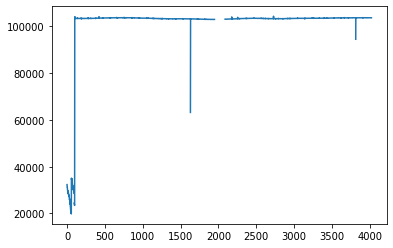

In [23]:
plt.figure()
plt.plot(eh[1].data['FLUX'])